In [1]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def simular_vasicek(rates, a, b, sigma, T, n_steps, n_simulations):
    # Los autores de la funcion simular_vasicek fueron Maria Jose y Luisa Gracias :)
    
    dt = 1
    rate_rolling = []
    mb_list = []
    for r in rates:
        rates_predict = []
        mb = []
        for _ in range(n_simulations):
            dr = a * (b - r) * dt + sigma * np.random.normal(0, np.sqrt(dt))
            rates_predict.append(max(0, r + dr))
            mb.append(r * dr)  # Guardar cada tasa simulada multiplicada por dr
        mb_list.append(np.array(mb))
        r_predict = np.mean(rates_predict)
        rate_rolling.append(r_predict)
    return np.array(rate_rolling), mb_list


def rmse(resagada, predicion):
    l_rmse = []
    for i in range(len(resagada)):
        se = (resagada[i]-predicion[i])**2
        l_rmse.append(se)
    rmse = (sum(l_rmse)/len(l_rmse))**(1/2)
    return rmse
    
from sklearn.metrics import r2_score

def calculate_r_squared(y_true, y_pred):
    """
    Calcula el R cuadrado dado los valores reales y las predicciones.

    Args:
    - y_true: Lista o array de los valores reales.
    - y_pred: Lista o array de las predicciones.

    Returns:
    - r_squared: Valor del R cuadrado.
    """
    r_squared = r2_score(y_true, y_pred)
    return r_squared

In [4]:
parametros = pd.read_csv("parametros_modelos.csv")
parametros

,Modelo,media_alpha,media_b,media_sigma
0,Bayesiano,0.000021,0.033840,0.000454
1,Frecuentista,-0.098658,-0.003537,0.006586


In [5]:
# Acceder a los parámetros del modelo bayesiano
media_alpha_bayesiano = parametros.loc[parametros['Modelo'] == 'Bayesiano', 'media_alpha'].values[0]
media_b_bayesiano = parametros.loc[parametros['Modelo'] == 'Bayesiano', 'media_b'].values[0]
media_sigma_bayesiano = parametros.loc[parametros['Modelo'] == 'Bayesiano', 'media_sigma'].values[0]

# Acceder a los parámetros del modelo frecuentista
media_alpha_frecuentista = parametros.loc[parametros['Modelo'] == 'Frecuentista', 'media_alpha'].values[0]
media_b_frecuentista = parametros.loc[parametros['Modelo'] == 'Frecuentista', 'media_b'].values[0]
media_sigma_frecuentista = parametros.loc[parametros['Modelo'] == 'Frecuentista', 'media_sigma'].values[0]


In [7]:
serie = pd.read_csv("BONDS.csv",delimiter=",")

# Dividir todas las columnas excepto 'Date' por 100
columnas_numericas = serie.columns.drop('Series Description')
serie[columnas_numericas] = serie[columnas_numericas] / 100

# Mostrar el DataFrame resultante
serie

,Series Description,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
0,31/07/2001,0.0367,0.0354,0.0347,0.0353,0.0379,0.0406,0.0457,0.0486,0.0507,0.0561,0.0551
1,01/08/2001,0.0365,0.0353,0.0347,0.0356,0.0383,0.0409,0.0462,0.0490,0.0511,0.0563,0.0553
2,02/08/2001,0.0365,0.0353,0.0346,0.0357,0.0389,0.0417,0.0469,0.0497,0.0517,0.0568,0.0557
3,03/08/2001,0.0363,0.0352,0.0347,0.0357,0.0391,0.0422,0.0472,0.0499,0.0520,0.0570,0.0559
4,06/08/2001,0.0362,0.0352,0.0347,0.0356,0.0388,0.0417,0.0471,0.0499,0.0519,0.0570,0.0559
...,...,...,...,...,...,...,...,...,...,...,...,...
5658,15/03/2024,0.0552,0.0548,0.0538,0.0505,0.0472,0.0451,0.0433,0.0433,0.0431,0.0455,0.0443
5659,18/03/2024,0.0552,0.0548,0.0539,0.0506,0.0473,0.0452,0.0436,0.0435,0.0434,0.0457,0.0446
5660,19/03/2024,0.0552,0.0548,0.0539,0.0506,0.0468,0.0447,0.0431,0.0431,0.0430,0.0454,0.0444
5661,20/03/2024,0.0550,0.0547,0.0536,0.0501,0.0459,0.0441,0.0425,0.0428,0.0427,0.0453,0.0445


In [8]:
for columna in serie.columns.drop('Series Description'):
    lista_resagada = serie[columna].tolist()
    lista_resagada.pop(0)  # Quitar el primer elemento
    lista_resagada.append(pd.NA)  # Añadir NA al último elemento
    serie[f"{columna}_resagada"] = lista_resagada

# Mostrar el DataFrame resultante
serie = serie.iloc[:-1]
serie

,Series Description,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,...,3-month_resagada,6-month_resagada,1-year_resagada,2-year_resagada,3-year_resagada,5-year_resagada,7-year_resagada,10-year_resagada,20-year_resagada,30-year_resagada
0,31/07/2001,0.0367,0.0354,0.0347,0.0353,0.0379,0.0406,0.0457,0.0486,0.0507,...,0.0353,0.0347,0.0356,0.0383,0.0409,0.0462,0.049,0.0511,0.0563,0.0553
1,01/08/2001,0.0365,0.0353,0.0347,0.0356,0.0383,0.0409,0.0462,0.0490,0.0511,...,0.0353,0.0346,0.0357,0.0389,0.0417,0.0469,0.0497,0.0517,0.0568,0.0557
2,02/08/2001,0.0365,0.0353,0.0346,0.0357,0.0389,0.0417,0.0469,0.0497,0.0517,...,0.0352,0.0347,0.0357,0.0391,0.0422,0.0472,0.0499,0.052,0.057,0.0559
3,03/08/2001,0.0363,0.0352,0.0347,0.0357,0.0391,0.0422,0.0472,0.0499,0.0520,...,0.0352,0.0347,0.0356,0.0388,0.0417,0.0471,0.0499,0.0519,0.057,0.0559
4,06/08/2001,0.0362,0.0352,0.0347,0.0356,0.0388,0.0417,0.0471,0.0499,0.0519,...,0.0352,0.0347,0.0356,0.039,0.0419,0.0472,0.05,0.052,0.0571,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,14/03/2024,0.0552,0.0548,0.0538,0.0504,0.0468,0.0446,0.0429,0.0430,0.0429,...,0.0548,0.0538,0.0505,0.0472,0.0451,0.0433,0.0433,0.0431,0.0455,0.0443
5658,15/03/2024,0.0552,0.0548,0.0538,0.0505,0.0472,0.0451,0.0433,0.0433,0.0431,...,0.0548,0.0539,0.0506,0.0473,0.0452,0.0436,0.0435,0.0434,0.0457,0.0446
5659,18/03/2024,0.0552,0.0548,0.0539,0.0506,0.0473,0.0452,0.0436,0.0435,0.0434,...,0.0548,0.0539,0.0506,0.0468,0.0447,0.0431,0.0431,0.043,0.0454,0.0444
5660,19/03/2024,0.0552,0.0548,0.0539,0.0506,0.0468,0.0447,0.0431,0.0431,0.0430,...,0.0547,0.0536,0.0501,0.0459,0.0441,0.0425,0.0428,0.0427,0.0453,0.0445


In [9]:
T = 1.0    # Horizonte temporal (1 año)
n_steps = 10  # Número de pasos de tiempo
n_simulations = 100

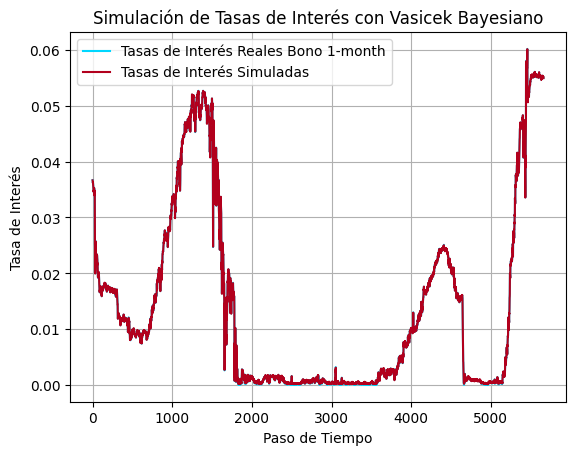

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0006481427228944726
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9985195436950415


In [11]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['1-month'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['1-month'].tolist(), label='Tasas de Interés Reales Bono 1-month', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['1-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['1-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')

## Simulacion Bayesiana Bonos, RMSE, R2

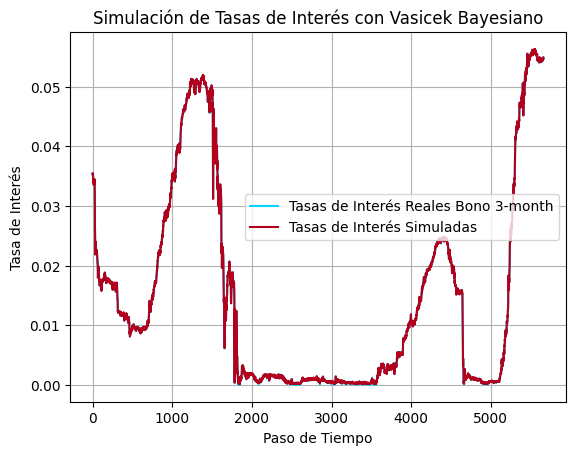

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.00045459174771226554
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9992964863788742


In [10]:
# Gráfico de las tasas de interés simuladas
#BONO ORIGINAL

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['3-month'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['3-month'].tolist(), label='Tasas de Interés Reales Bono 3-month', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['3-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['3-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')

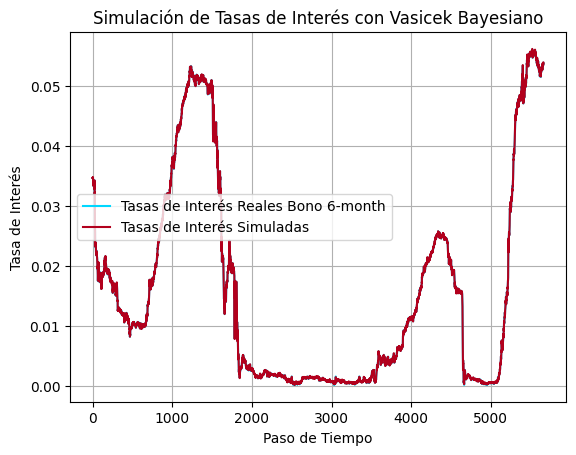

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.00037977149325237714
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9995179594049266


In [12]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['6-month'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['6-month'].tolist(), label='Tasas de Interés Reales Bono 6-month', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['6-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['6-month_resagada'].tolist(), tasas_simuladas_vasicekb)}')

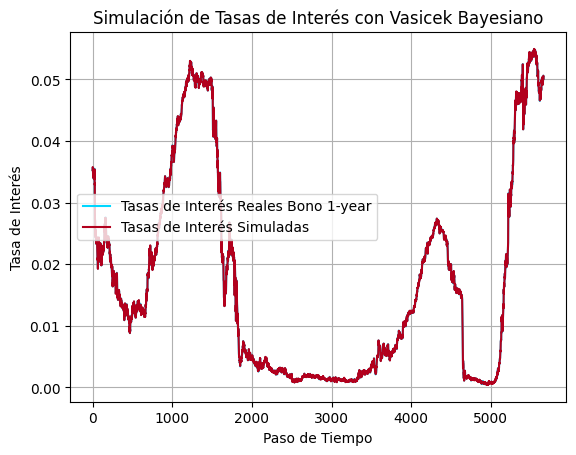

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0004134065681169092
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9993872359905557


In [13]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['1-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['1-year'].tolist(), label='Tasas de Interés Reales Bono 1-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['1-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['1-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

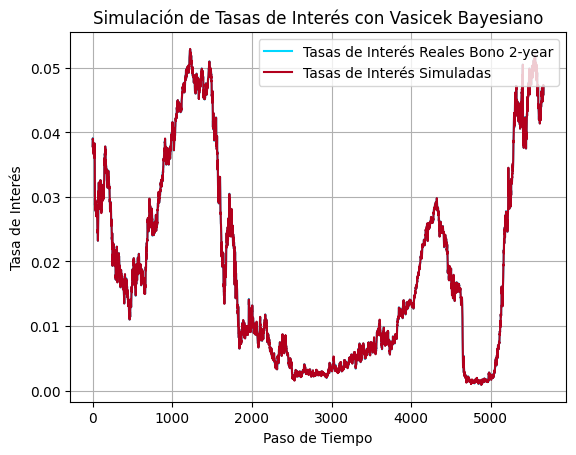

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0005458870500067955
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9987345707056556


In [14]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['2-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['2-year'].tolist(), label='Tasas de Interés Reales Bono 2-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['2-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['2-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

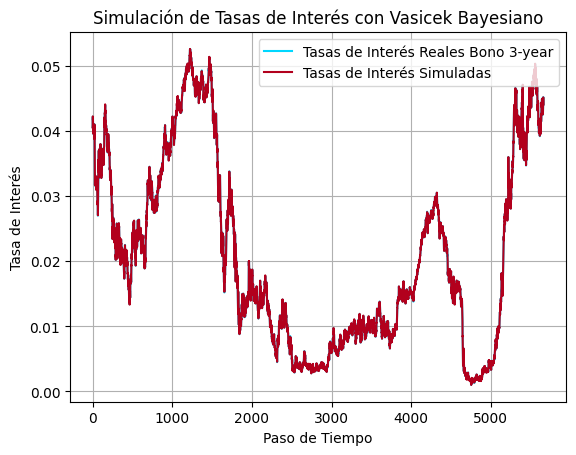

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0005841843286979554
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9983499099729184


In [15]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['3-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['3-year'].tolist(), label='Tasas de Interés Reales Bono 3-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['3-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['3-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

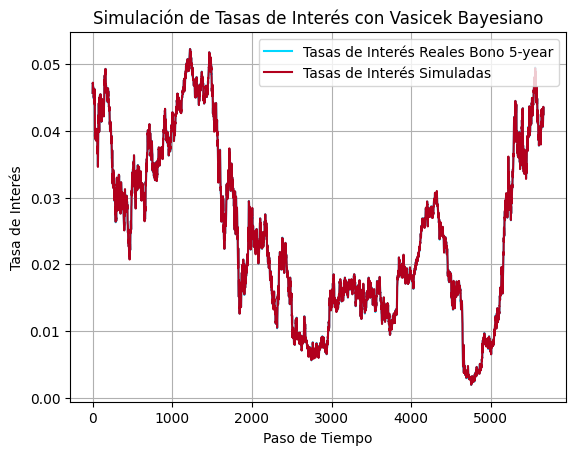

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0006153789640659732
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9977736192929106


In [16]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['5-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['5-year'].tolist(), label='Tasas de Interés Reales Bono 5-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['5-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['5-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

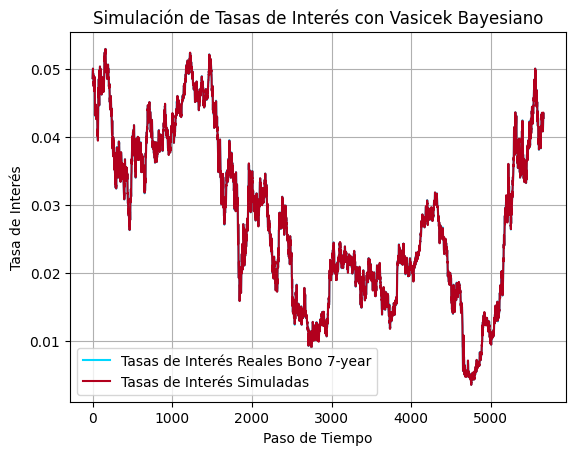

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0006185722815449203
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9974422461508553


In [18]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['7-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['7-year'].tolist(), label='Tasas de Interés Reales Bono 7-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['7-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['7-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

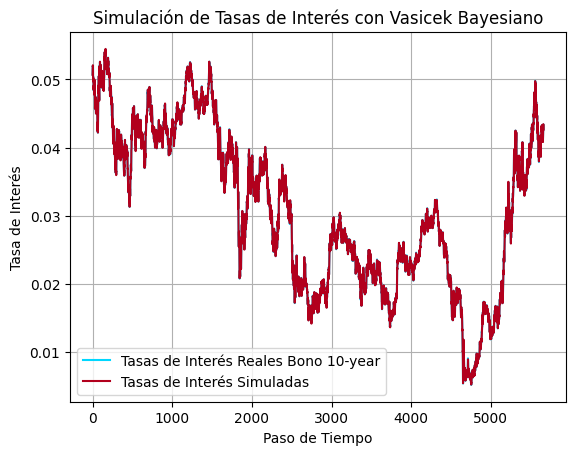

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0005877280036444767
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9974869048473809


In [17]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['10-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['10-year'].tolist(), label='Tasas de Interés Reales Bono 10-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['10-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['10-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

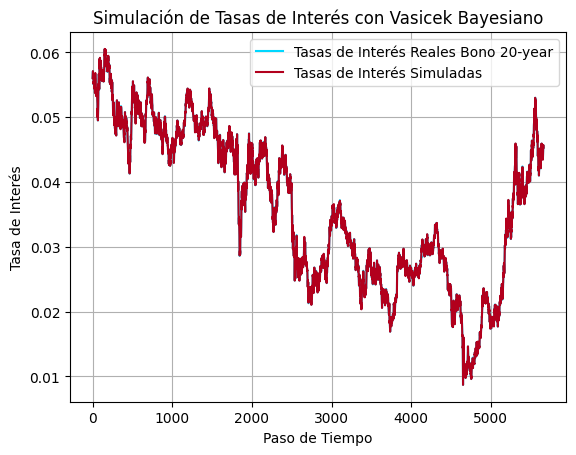

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0005608851262035037
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9978394776955888


In [19]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['20-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['20-year'].tolist(), label='Tasas de Interés Reales Bono 20-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['20-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['20-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

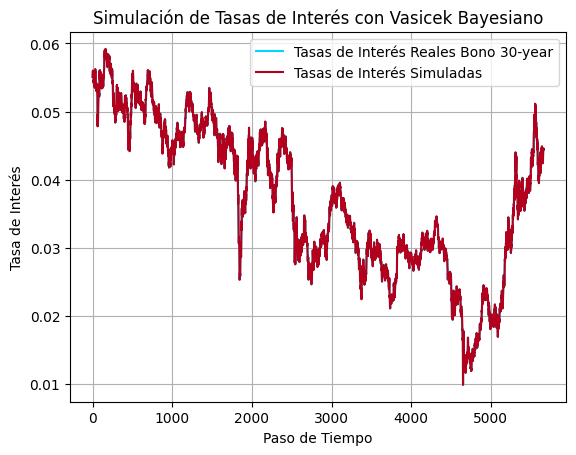

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek bayesiano es 0.0005425919586455515
-------------------------------------------------------------------------
El R2 para el modelo vasicek bayesiano es 0.9976083343126588


In [11]:
# Gráfico de las tasas de interés simuladas

tasas_simuladas_vasicekb, movi_brown_vasicekb = simular_vasicek(serie['30-year'].tolist(),media_alpha_bayesiano,media_b_bayesiano,media_sigma_bayesiano,T, n_steps, n_simulations)

plt.plot(serie['30-year'].tolist(), label='Tasas de Interés Reales Bono 30-year', color='#00D7FF')
plt.plot(tasas_simuladas_vasicekb, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Bayesiano')
plt.legend()
plt.grid(True)
plt.show()


print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek bayesiano es {rmse(serie['30-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek bayesiano es {calculate_r_squared(serie['30-year_resagada'].tolist(), tasas_simuladas_vasicekb)}')

## Simulacion Frecuentista Bonos, RMSE, R2

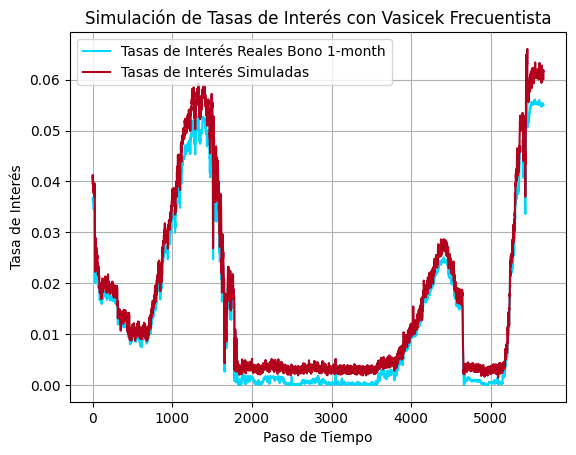

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0030769201637953995
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.96663533635634


In [20]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['1-month'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['1-month'].tolist(), label='Tasas de Interés Reales Bono 1-month',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['1-month_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['1-month_resagada'].tolist(), tasas_simuladas_vasicek)}')

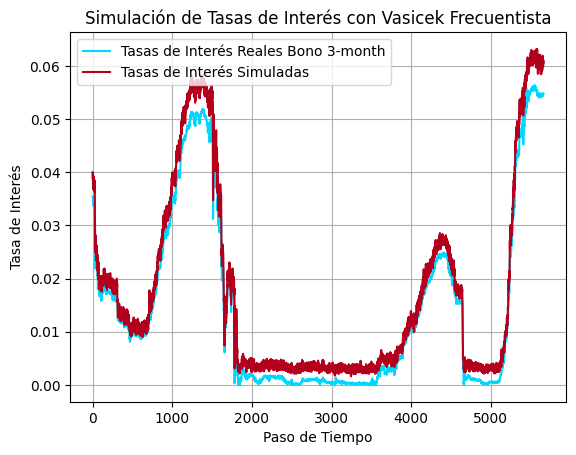

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0030604109656184758
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9681148169924036


In [21]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['3-month'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['3-month'].tolist(), label='Tasas de Interés Reales Bono 3-month',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['3-month_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['3-month_resagada'].tolist(), tasas_simuladas_vasicek)}')

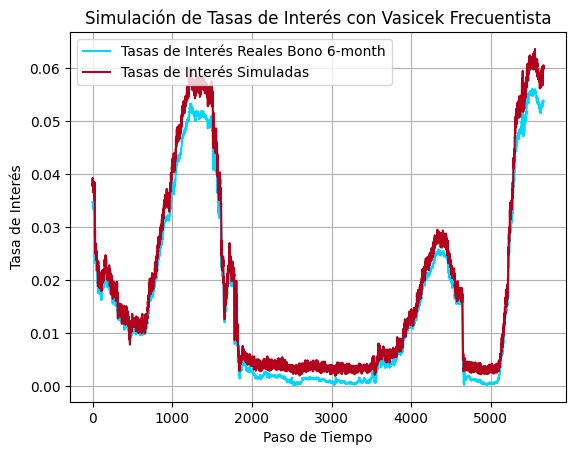

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0030602888234372446
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9686986029248817


In [22]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['6-month'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['6-month'].tolist(), label='Tasas de Interés Reales Bono 6-month',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['6-month_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['6-month_resagada'].tolist(), tasas_simuladas_vasicek)}')

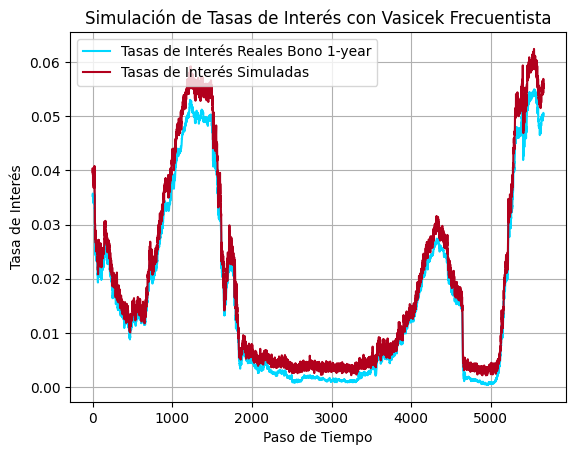

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0029900711885330867
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9679445733907031


In [23]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['1-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['1-year'].tolist(), label='Tasas de Interés Reales Bono 1-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['1-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['1-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

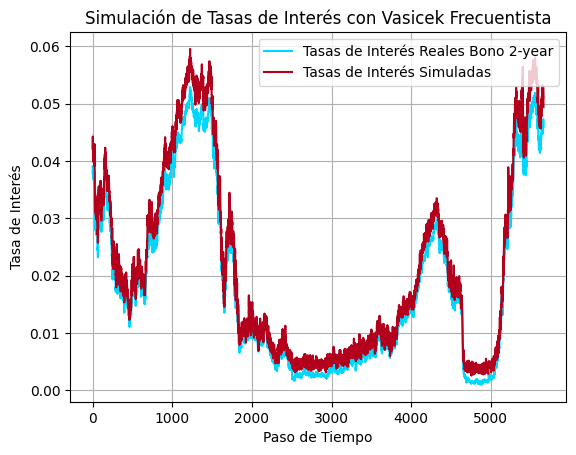

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0029841051470666873
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.962185310033352


In [24]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['2-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['2-year'].tolist(), label='Tasas de Interés Reales Bono 2-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['2-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['2-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

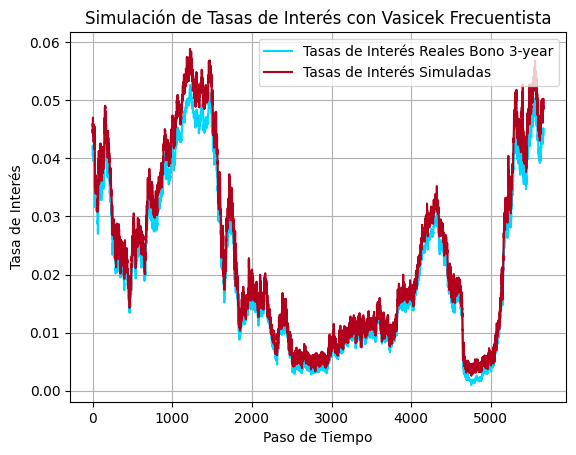

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0030214998376243917
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9558579005250909


In [25]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['3-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['3-year'].tolist(), label='Tasas de Interés Reales Bono 3-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['3-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['3-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

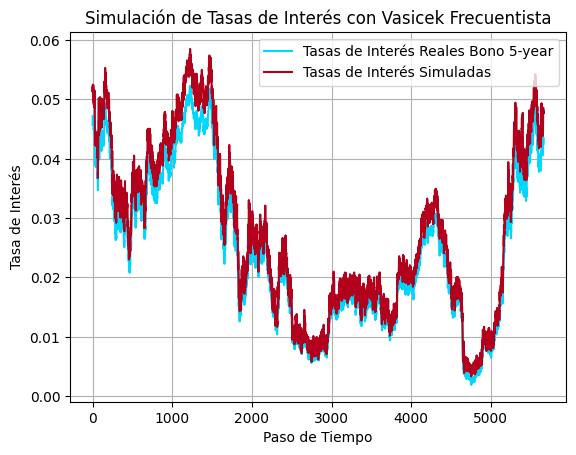

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.003210810363620138
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9393901164826697


In [26]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['5-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['5-year'].tolist(), label='Tasas de Interés Reales Bono 5-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['5-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['5-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

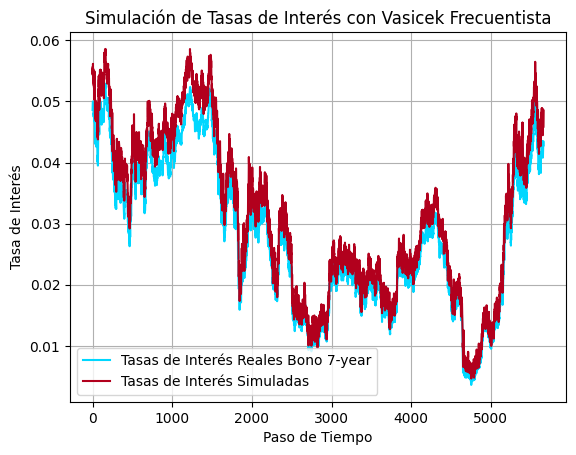

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0034696359469125956
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9195278409001636


In [27]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['7-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['7-year'].tolist(), label='Tasas de Interés Reales Bono 7-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['7-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['7-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

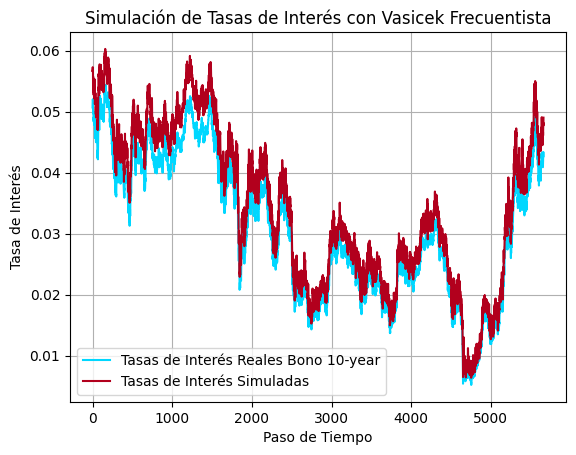

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.0036983541597044537
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.9004885260242762


In [28]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['10-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['10-year'].tolist(), label='Tasas de Interés Reales Bono 10-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['10-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['10-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

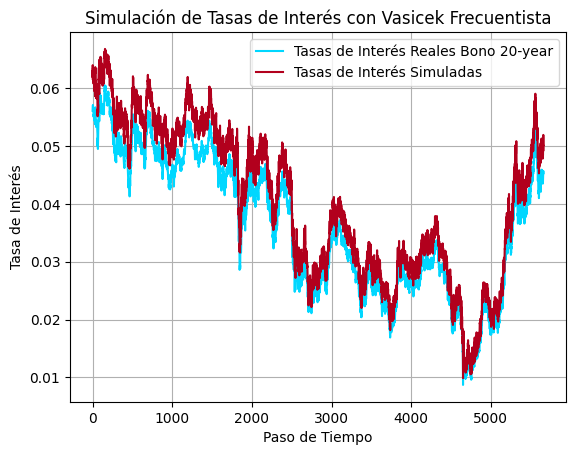

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.004183086539201718
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.8798276355890187


In [29]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['20-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['20-year'].tolist(), label='Tasas de Interés Reales Bono 20-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['20-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['20-year_resagada'].tolist(), tasas_simuladas_vasicek)}')

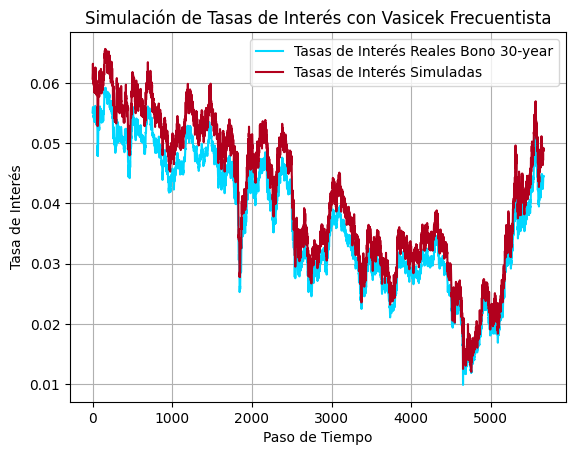

-------------------------------------------------------------------------
El RMSE para el modelo de Vasicek frecuentista es 0.004242424193381527
-------------------------------------------------------------------------
El R2 para el modelo vasicek frecuentista es 0.8537883600911707


In [30]:
tasas_simuladas_vasicek, movi_brown_vasicek = simular_vasicek(serie['30-year'].tolist(),media_alpha_frecuentista,media_b_frecuentista,media_sigma_frecuentista,T, n_steps, n_simulations)

# Gráfico de las tasas de interés simuladas
plt.plot(serie['30-year'].tolist(), label='Tasas de Interés Reales Bono 30-year',color='#00D7FF')
plt.plot(tasas_simuladas_vasicek, label='Tasas de Interés Simuladas',color='#B2001D')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Simulación de Tasas de Interés con Vasicek Frecuentista')
plt.legend()
plt.grid(True)
plt.show()
print('-------------------------------------------------------------------------')
print(f'El RMSE para el modelo de Vasicek frecuentista es {rmse(serie['30-year_resagada'].tolist(), tasas_simuladas_vasicek)}')
print('-------------------------------------------------------------------------')
print(f'El R2 para el modelo vasicek frecuentista es {calculate_r_squared(serie['30-year_resagada'].tolist(), tasas_simuladas_vasicek)}')